# Keras 개발 Process
1. 입력 텐서(X)와 출력 텐서(y)로 이뤄진 **훈련 데이터를 정의**

2. 입력과 출력을 연결하는 Layer(층)으로 이뤄진 **네트워크(모델)을 정의**
    - Sequential 방식: 순서대로 쌓아올린 네트워크로 이뤄진 모델을 생성하는 방식
    - Functional API 방식: 다양한 구조의 네트워크로 이뤄진 모델을 생성하는 방식
    - Subclass 방식: 네트워크를 정의하는 클래스를 구현

3. **모델 Compile(컴파일)**
    - 모델이 Train(학습)할때 사용할 손실함수(Loss Function), 최적화 기법(Optimizer), 학습과정을 모니터링할 평가지표(Metrics)를 설정
    > Compile: 실행할 수 있는 상태로 만들어 주는 것

4. **Training(학습/훈련)**
    - Train dataset을 이용해 모델을 학습

## MNIST 이미지 분류
- 흑백 손글씨 숫자 0~9까지 10개의 범주로 구분한 데이터셋
- 하나의 이미지는 28 * 28 pixel의 크기
- 6만개의 Train 이미지와 1만개의 Test 이미지로 구성

### import

In [2]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

# seed값 설정
np.random.seed(0)
tf.random.set_seed(0)
random.seed(0)

2.11.0


### MNIST dataset Loading

In [4]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

In [5]:
train_image.shape, train_label.shape, test_image.shape, test_label.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
# y값 확인
train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

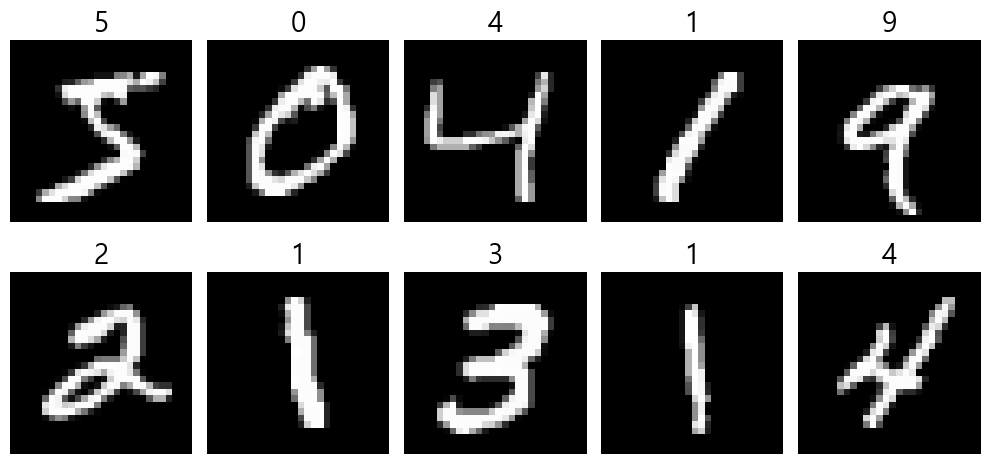

In [7]:
# X값 - image 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_image[i], cmap = 'gray')
    plt.title(f'{train_label[i]}', fontsize = 20)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [8]:
train_image[0].min(), train_image[0].max()

(0, 255)

### 데이터 준비
- X(Input Data Image)
    - 0 ~ 1 사이의 값으로 정규화 시킨다
    - minmax scaling 값을 255로 나눈다
- y(Output Data)
    - one hot encoding 처리
        - Label이 다중분류(Multi class classification)일 경우 One Hot Encoding 한다
        - 딥러닝 모델이 각 Label별 확률을 출력하도록 정의 되기 때문에 y(정답)도 같은 형태로 만들어야 한다
    - Keras의 one hot encoding 처리 함수
        - tensorflow.keras.utils.to_categorical()

### Input Image(X)를 정규화
- 이미지를 0 ~ 1로 정규화 하고 타입을 float32로 변환

In [9]:
train_image.dtype

dtype('uint8')

In [10]:
X_train = train_image.astype('float32')/255
X_test = test_image.astype('float32')/255

# 딥러닝 모델은 기본적으로 선형회귀 모델을 feature scaling하여 성능을 올린다

### Label(y)를 one hot encoding

In [11]:
np.unique(train_label, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [12]:
y_train = keras.utils.to_categorical(train_label, num_classes = 10)
y_test = keras.utils.to_categorical(test_label)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [13]:
train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [14]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### 네트워크(모델) 정의
- Network: 전체 모델 구조
- Layer들이 연결되어 있는 구조
- 각각의 Layer는 unit을 가진다

In [18]:
model = keras.Sequential()

model.add(keras.layers.InputLayer((28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units = 256))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(units = 128))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(units = 10))
model.add(keras.layers.Softmax(name = 'output'))

In [19]:
model2 = keras.Sequential([
    keras.layers.InputLayer((28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(256),
    keras.layers.ReLU(),
    keras.layers.Dense(10),
    keras.layers.Softmax()
])

In [20]:
# 모델의 구조를 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 re_lu_3 (ReLU)              (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 re_lu_4 (ReLU)              (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
 output (Softmax)            (None, 10)               

- Param : 학습시킬 대상의 parameter

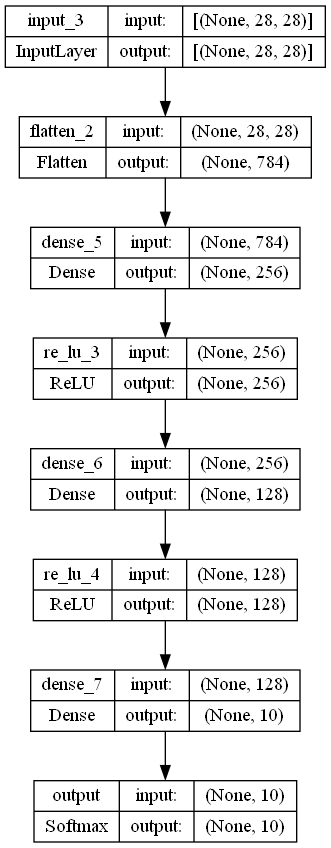

In [21]:
# 모델 구조를 시각화
keras.utils.plot_model(model,
                       show_shapes = True
                       )

### 컴파일 단계
- 정의된 딥러닝 모델을 학습할 수 있는 상태로 만들어 주기 위히 다음을 추가적으로 설정
    - Optimizer
    - 손실함수
    - 평가지표

In [22]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### 학습(fit)
- model.fit()
    - 모델 학습 메소드
    - 학습과정의 Log를 History 객체로 반환
- History: train시 에폭별 평가지표값들을 모아서 제공

In [23]:
history = model.fit(X_train, y_train,
                    epochs = 10,
                    batch_size = 100,
                    validation_split = 0.3)

Epoch 1/10
420/420 [==============================] - 6s 10ms/step - loss: 0.3090 - accuracy: 0.9111 - val_loss: 0.1656 - val_accuracy: 0.9514
Epoch 2/10
420/420 [==============================] - 3s 7ms/step - loss: 0.1199 - accuracy: 0.9645 - val_loss: 0.1206 - val_accuracy: 0.9646
Epoch 3/10
420/420 [==============================] - 4s 9ms/step - loss: 0.0780 - accuracy: 0.9763 - val_loss: 0.1073 - val_accuracy: 0.9693
Epoch 4/10
420/420 [==============================] - 3s 8ms/step - loss: 0.0532 - accuracy: 0.9840 - val_loss: 0.1111 - val_accuracy: 0.9672
Epoch 5/10
420/420 [==============================] - 4s 9ms/step - loss: 0.0383 - accuracy: 0.9883 - val_loss: 0.0988 - val_accuracy: 0.9716
Epoch 6/10
420/420 [==============================] - 3s 7ms/step - loss: 0.0295 - accuracy: 0.9904 - val_loss: 0.0994 - val_accuracy: 0.9731
Epoch 7/10
420/420 [==============================] - 3s 7ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0975 - val_accuracy: 0.9751
Epoch

### History 시각화

In [24]:
print(type(history))
print('학습 에폭리스트:', history.epoch)
print('에폭수, 에폭당 step수:', history.params)

<class 'keras.callbacks.History'>
학습 에폭리스트: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
에폭수, 에폭당 step수: {'verbose': 1, 'epochs': 10, 'steps': 420}


In [25]:
print(history.history)

{'loss': [0.3089810013771057, 0.11990194022655487, 0.0779753178358078, 0.05318401753902435, 0.03826196864247322, 0.02949320524930954, 0.02063908241689205, 0.01618158631026745, 0.019818240776658058, 0.015859143808484077], 'accuracy': [0.9111190438270569, 0.9644523859024048, 0.9763333201408386, 0.9840475916862488, 0.9883095026016235, 0.9904285669326782, 0.9933809638023376, 0.9952619075775146, 0.993309497833252, 0.9947618842124939], 'val_loss': [0.16563807427883148, 0.12062912434339523, 0.10727758705615997, 0.11105041950941086, 0.09877591580152512, 0.09938976168632507, 0.0974537581205368, 0.10242538899183273, 0.12515299022197723, 0.10322636365890503], 'val_accuracy': [0.9513888955116272, 0.9646111130714417, 0.9692777991294861, 0.9671666622161865, 0.9715555310249329, 0.973111093044281, 0.9751111268997192, 0.9733333587646484, 0.9707221984863281, 0.9757221937179565]}


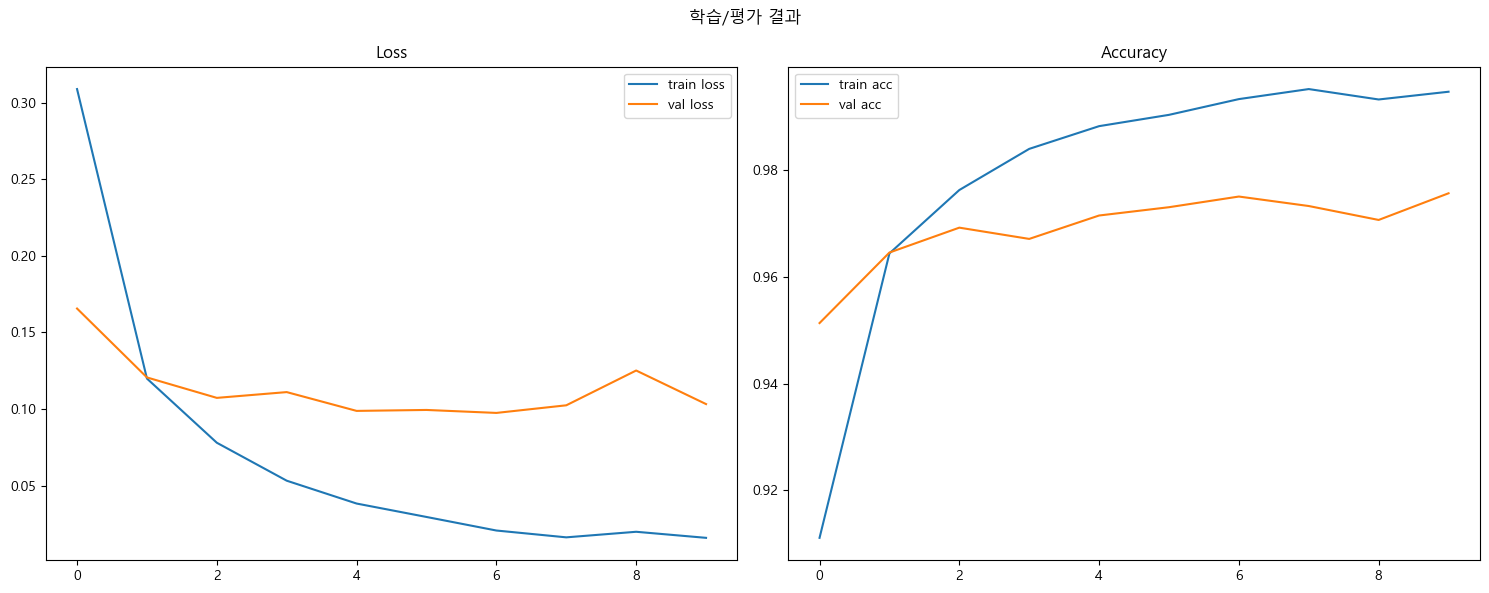

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.suptitle('학습/평가 결과')

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

- epoch수도 과적합과 관련이 있다
    - validation이 나빠지는 순간이 있음
    - epoch을 많이 돈다고 좋은 것은 아님

### 테스트셋 평가

In [28]:
result = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0797 - accuracy: 0.9796


In [29]:
result

[0.07968610525131226, 0.9796000123023987]

### 새로운 데이터 추론
- 새로운 데이터를 추론하기 전 학습 데이터에 했던 전처리 과정을 동일하게 적용 후 추론한다

#### 추론 메소드
- predict()
    - **분류**: 각 클래스 별 확률 반환
    - **회귀**: 최종 예측 결과
- 분류 문제일 때 predict() 결과에서 class label 출력
    - 이진 분류(binary classification)
        - `numpy.where(model.predict(x) > 0.5, 1, 0).astype("int32")`
    - 다중 클래스 분류(multi-class classification)
        - `numpy.argmax(model.predict(x), axis = 1)`

In [30]:
X_new = X_test[:3]
X_new.shape

(3, 28, 28)

In [31]:
pred = model.predict(X_new)

1/1 [==============================] - 0s 261ms/step


In [32]:
print(pred.shape)
np.round(pred, 3)

(3, 10)


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
np.argmax(pred, axis = -1)

array([7, 2, 1], dtype=int64)

In [34]:
np.argmax(y_test[:3], axis = -1)

array([7, 2, 1], dtype=int64)

## 직접 그린 그림 추론하기
1. opencv로 그림판으로 그린 숫자이미지를 읽는다
2. 28 X 28로 resize
3. 모델을 이용해 추론


In [36]:
import cv2
two = cv2.imread('test_img/two.png', cv2.IMREAD_GRAYSCALE)
seven = cv2.imread('test_img/seven.png', cv2.IMREAD_GRAYSCALE)
eight = cv2.imread('test_img/eight.png', cv2.IMREAD_GRAYSCALE)

two = cv2.resize(two, (28, 28), interpolation = cv2.INTER_AREA)
seven = cv2.resize(seven, (28, 28), interpolation = cv2.INTER_AREA)
eight = cv2.resize(eight, (28, 28), interpolation = cv2.INTER_AREA)

two.shape, type(two)

((28, 28), numpy.ndarray)

### 이미지 전처리
- float으로 변환, scaling

In [38]:
new_data = np.array([two.astype('float32')/255,
                     seven.astype('float32')/255,
                     eight.astype('float32')/255])
new_data.shape

(3, 28, 28)

In [39]:
new_data.max(), new_data.min()

(1.0, 0.0)

In [40]:
pred = model.predict(new_data)
print(pred.shape)
np.round(pred, 3)

1/1 [==============================] - 0s 48ms/step
(3, 10)


array([[0.   , 0.   , 0.996, 0.004, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.049, 0.007, 0.633, 0.   , 0.   , 0.   , 0.004, 0.304,
        0.002],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   ,
        0.   ]], dtype=float32)

In [42]:
# 실제값은 2, 7, 8
np.argmax(pred, axis = -1)

array([2, 3, 8], dtype=int64)